In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn.apionly as sns
import statsmodels.formula.api as smf
import sklearn
from sklearn.neighbors import KNeighborsClassifier


c:\users\jenn\workbookenv\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
import sqlite3
 
conn = sqlite3.connect("census.db") # or use :memory: to put it in RAM
 
cursor = conn.cursor()


In [3]:
sql = """
        SELECT 
            iMeans, dAge, iCitizen, dDepart, dHours, dIncome1, 
            iMarital, dOccup, iRagechld, iYearsch,iYearwrk,
            iSex,dIndustry,dRearning,dTravtime
         FROM census c
         WHERE iSchool = '1' AND iRLabor IN ('1','2')
        ;"""
census_subset6 = pd.read_sql_query(sql, conn)
census_subset = census_subset6.copy() 
# combined2.to_sql('combined2', connection, if_exists='append', index=False)
print(census_subset.columns.values)

['iMeans' 'dAge' 'iCitizen' 'dDepart' 'dHours' 'dIncome1' 'iMarital'
 'dOccup' 'iRagechld' 'iYearsch' 'iYearwrk' 'iSex' 'dIndustry' 'dRearning'
 'dTravtime']


In [97]:
print(census_subset.shape)
print(census_subset['iMeans'].value_counts())

(988873, 17)
1     852400
11     32821
10     30109
2      24196
0      19122
4      11983
12      6779
5       4869
9       2761
8       1683
7       1287
3        533
6        330
Name: iMeans, dtype: int64


In [98]:
852400 / 988873

0.861991378063715

[Text(0,0,'walked'),
 Text(0,0,'Bus'),
 Text(0,0,'Subway'),
 Text(0,0,'railroad'),
 Text(0,0,'bicycle'),
 Text(0,0,'motorcycle'),
 Text(0,0,'taxi'),
 Text(0,0,'streetcar'),
 Text(0,0,'ferry')]

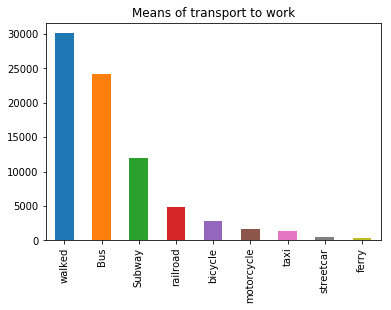

In [5]:
#Showing non-car options for commute:
non_car = census_subset[census_subset['iMeans'] != '1']
non_car = non_car[non_car['iMeans'] != '0']
non_car = non_car[non_car['iMeans'] != '11']
non_car = non_car[non_car['iMeans'] != '12']

non_car_hist = non_car['iMeans'].value_counts()
non_car_plot = non_car_hist.plot(kind="bar")
non_car_plot.set_title('Means of transport to work')
iMeans_types = {'1':'car,truck,van','2':'Bus','3':'Streetcar','4':'Subway','5':'railroad','6':'ferry',
                '7':'taxi','8':'motorcycle','9':'bicycle','10':'walked','11':'worked_at_home','12':'other'}
non_car_plot.set_xticklabels( ('walked','Bus','Subway','railroad','bicycle','motorcycle','taxi','streetcar','ferry') )


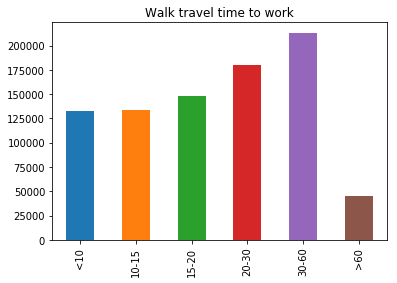

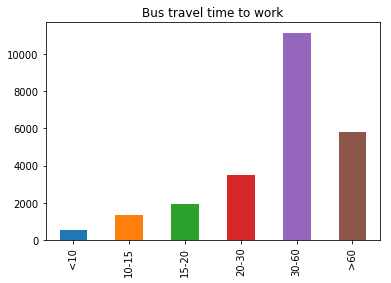

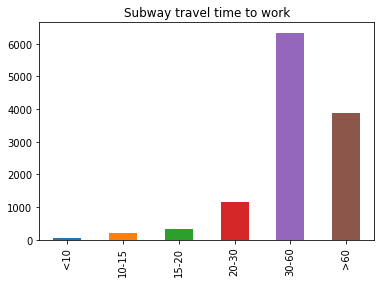

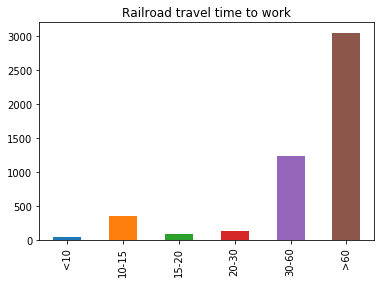

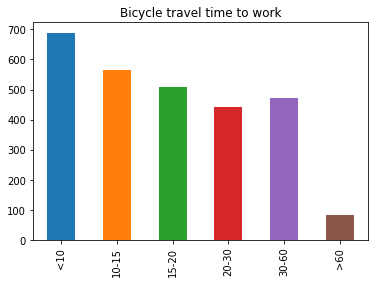

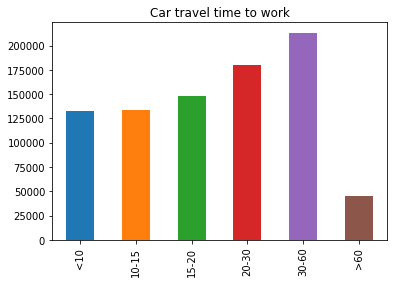

In [93]:
census_subset['intTravtime']=pd.to_numeric(census_subset['dTravtime'],errors='coerce')

car_time_data = census_subset[census_subset['iMeans'] == '1']
car_time = car_time_data['intTravtime'].value_counts().sort_index()
car_time_plot = car_time.plot(kind="bar")
car_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
car_time_plot.set_title('Car travel time to work')
iMeans_dataframes = [car_time_data]
iMeans_type = ['walk']
plt.show()

walked_time_data = census_subset[census_subset['iMeans'] == '10']
walked_time = walked_time_data['intTravtime'].value_counts().sort_index()
walked_time_plot = walked_time.plot(kind="bar")
walked_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
walked_time_plot.set_title('Walk travel time to work')
iMeans_dataframes = [walked_time_data]
iMeans_type = ['walk']
plt.show()
plt.show()
bus_time_data = census_subset[census_subset['iMeans'] == '2']
bus_time = bus_time_data['intTravtime'].value_counts().sort_index()
bus_time_plot = bus_time.plot(kind="bar")
bus_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
bus_time_plot.set_title('Bus travel time to work')
plt.show()
iMeans_dataframes.append(bus_time_data)
iMeans_type.append('bus')

subway_time_data = census_subset[census_subset['iMeans'] == '4']
subway_time = subway_time_data['intTravtime'].value_counts().sort_index()
subway_time_plot = subway_time.plot(kind="bar")
subway_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
subway_time_plot.set_title('Subway travel time to work')
plt.show()
iMeans_dataframes.append(subway_time_data)
iMeans_type.append('subway')

railroad_time_data = census_subset[census_subset['iMeans'] == '5']
railroad_time = railroad_time_data['intTravtime'].value_counts().sort_index()
railroad_time_plot = railroad_time.plot(kind="bar")
railroad_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
railroad_time_plot.set_title('Railroad travel time to work')
plt.show()
iMeans_dataframes.append(railroad_time_data)
iMeans_type.append('railroad')

bicycle_time_data = census_subset[census_subset['iMeans'] == '9']
bicycle_time = bicycle_time_data['intTravtime'].value_counts().sort_index()
bicycle_time_plot = bicycle_time.plot(kind="bar")
bicycle_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
bicycle_time_plot.set_title('Bicycle travel time to work')
plt.show()
iMeans_dataframes.append(bicycle_time_data)
iMeans_type.append('bicycle')

car_time_data = census_subset[census_subset['iMeans'] == '1']
car_time = car_time_data['intTravtime'].value_counts().sort_index()
car_time_plot = car_time.plot(kind="bar")
car_time_plot.set_xticklabels( ('<10','10-15','15-20','20-30','30-60','>60') )
car_time_plot.set_title('Car travel time to work')
plt.show()
iMeans_dataframes.append(car_time_data)
iMeans_type.append('car')


c:\users\jenn\workbookenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


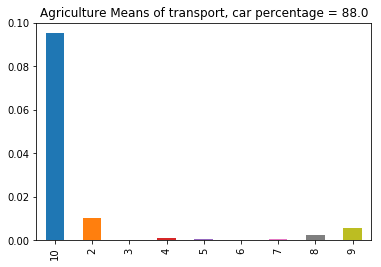

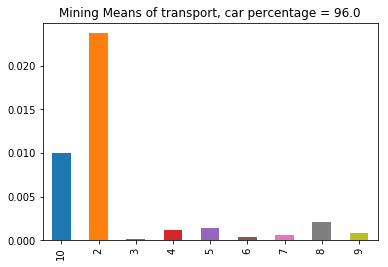

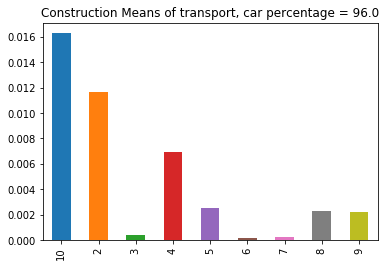

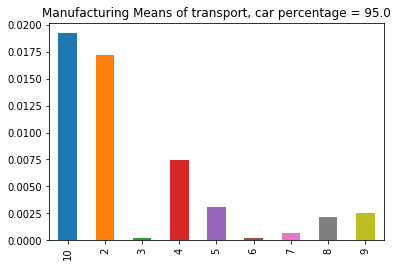

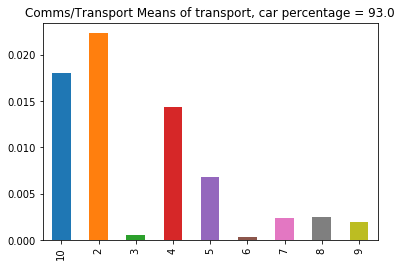

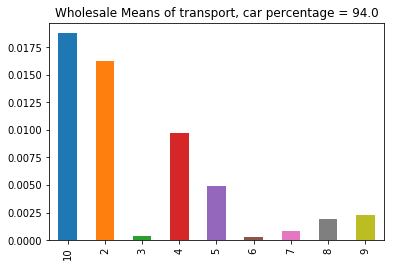

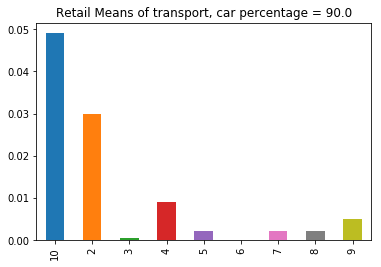

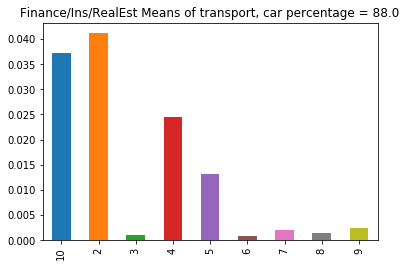

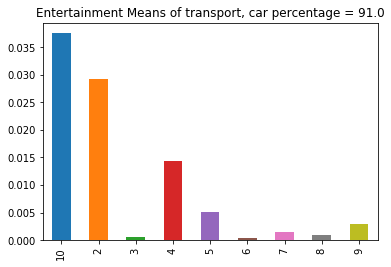

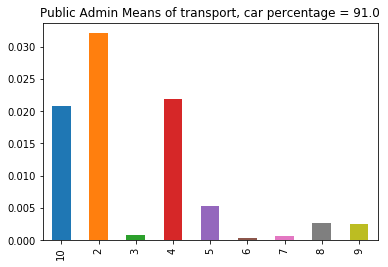

In [7]:
census_subset['intIndustry'] = pd.to_numeric(census_subset['dIndustry'])
iMeans_subset = census_subset[census_subset['iMeans'] != '0']
iMeans_subset = iMeans_subset[iMeans_subset['iMeans'] != '12']
ind_dict = {1:'Agriculture',2:'Mining',3:'Construction',4:'Manufacturing',5:'Comms/Transport',6:'Wholesale',7:'Retail',8:'Finance/Ins/RealEst',
           9:'Entertainment',10:'Public Admin',11:'Military'}
for i in range(1,11):
    ind = iMeans_subset[iMeans_subset['intIndustry']==i]
    ind['total_users']=ind.shape[0]
    ind = ind[ind['iMeans'] != '11']
    ind_perc = ind['iMeans'].value_counts() / ind.shape[0]
    car_perc = round(ind_perc[0],2)*100
    ind_plot = ind_perc[1:].sort_index().plot(kind='bar')
    
    ind_plot.set_title(ind_dict[i] + ' Means of transport, car percentage = ' + str(car_perc))
    plt.show()

# counted = iMeans_dataframes[i]['dTravtime'].value_counts()
# print(counted.sort_index())
# for i in range(len(iMeans_dataframes)):
#     transport_dataframe = iMeans_dataframes[i]
#     transport_plot = transport_dataframe['dIndustry'].value_counts().sort_index().plot(kind="bar")
#     transport_plot.set_title('Industry: ' + iMeans_type[i])
#     transport_plot.set_xticklabels( ('Agriculture','Public Admin','Mining','Construction','20-30','30-60','>60') )
#     plt.show()
    
    #    sns.barplot(x='iMeans', y='dTravtime', hue=None, data=users) 

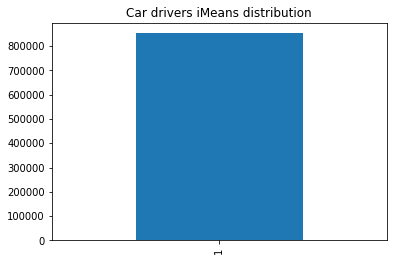

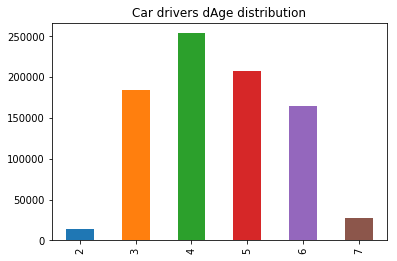

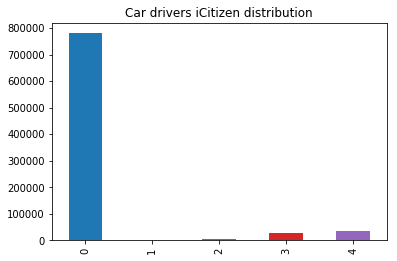

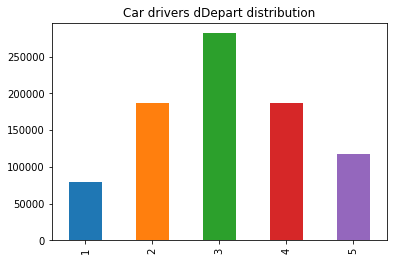

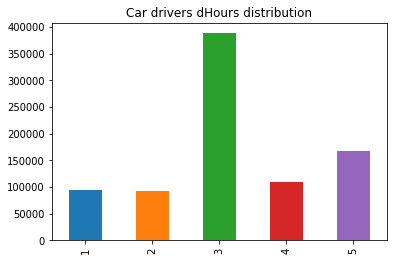

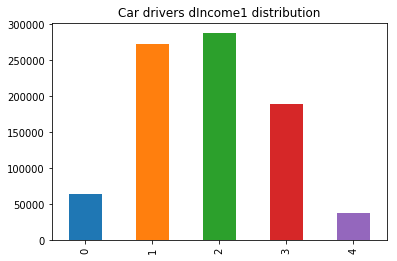

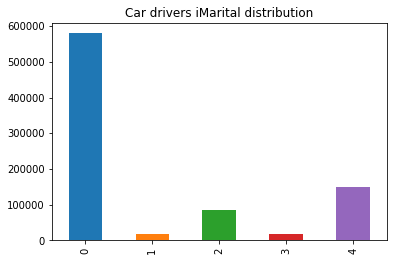

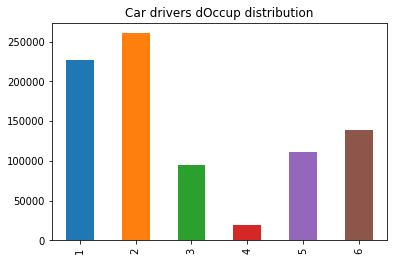

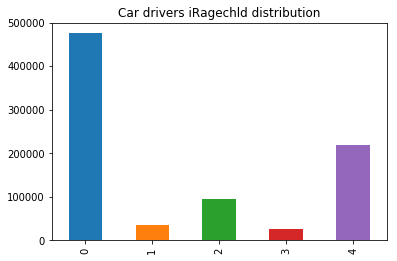

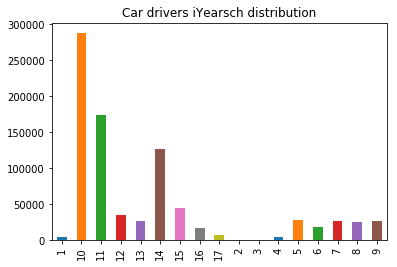

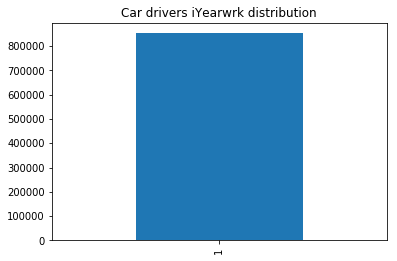

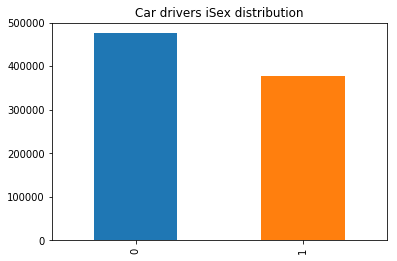

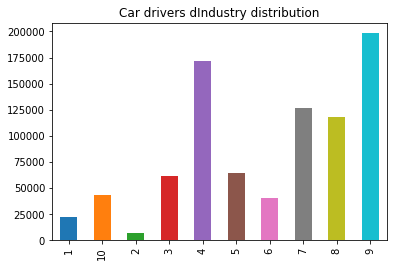

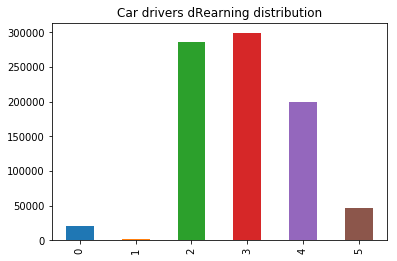

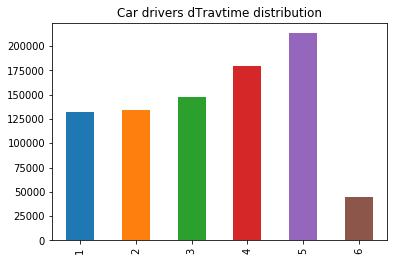

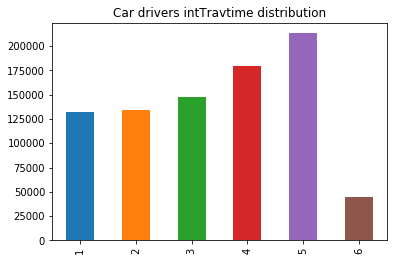

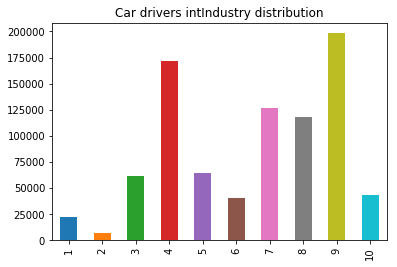

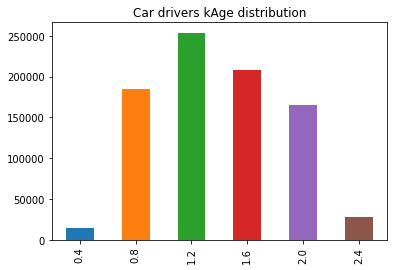

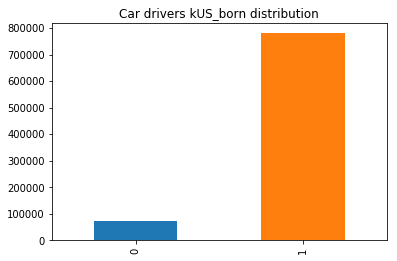

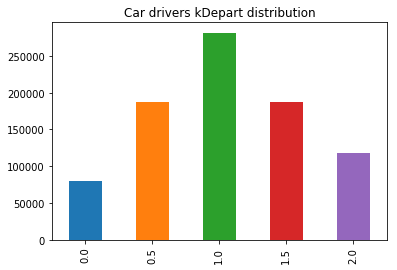

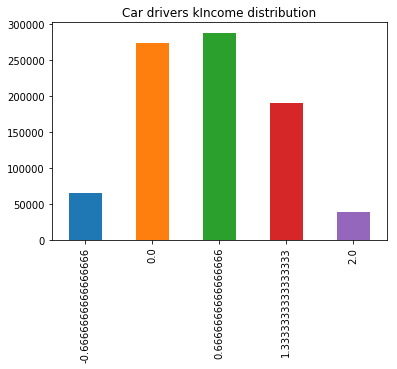

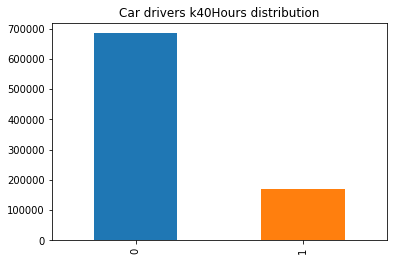

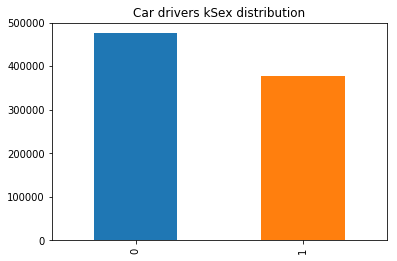

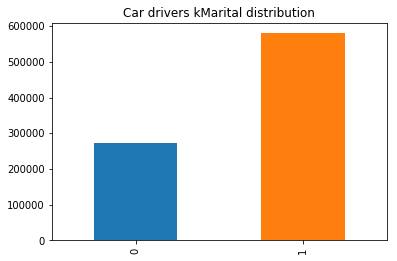

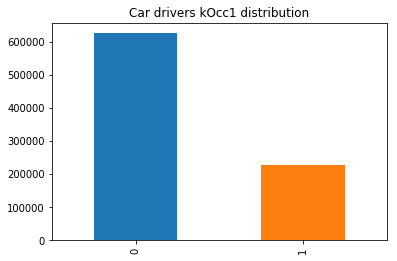

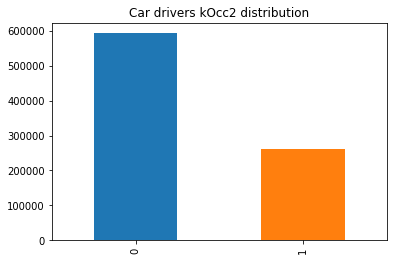

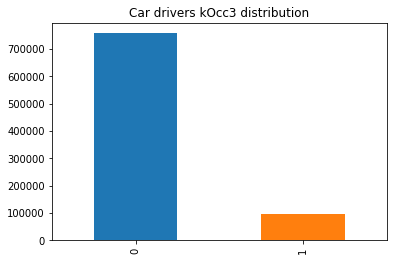

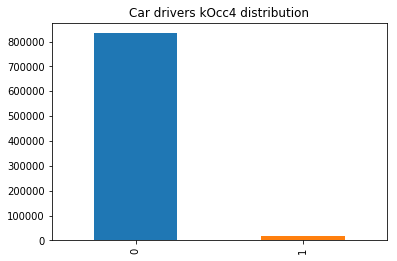

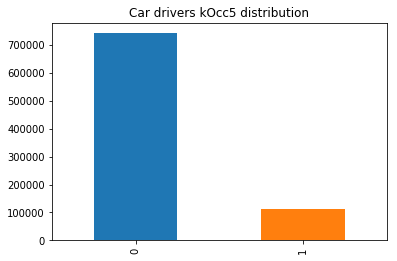

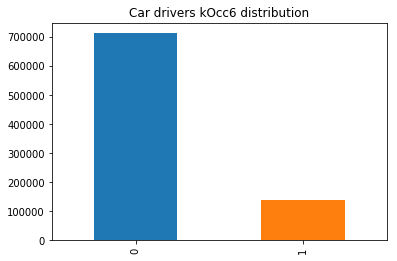

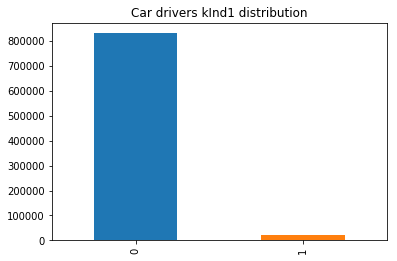

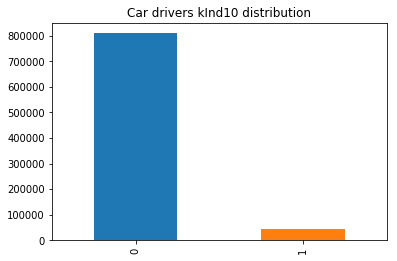

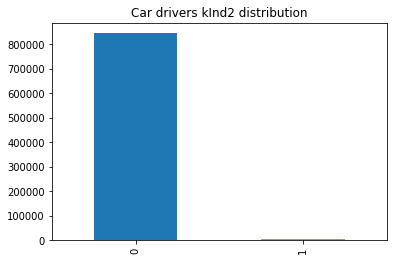

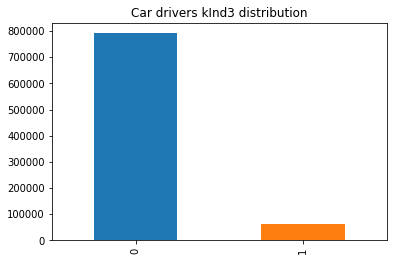

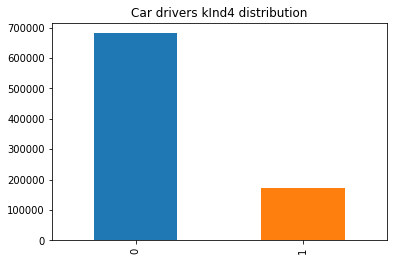

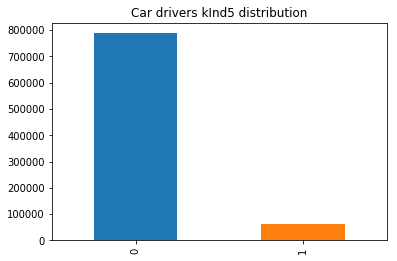

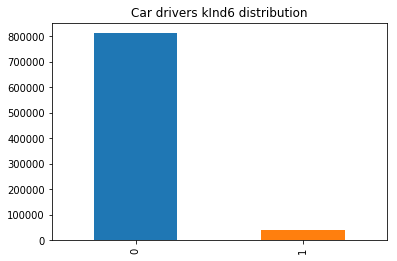

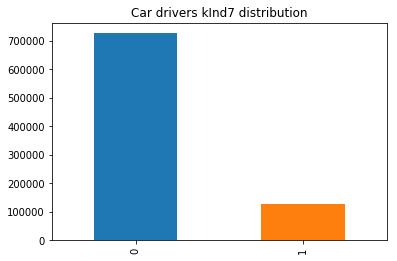

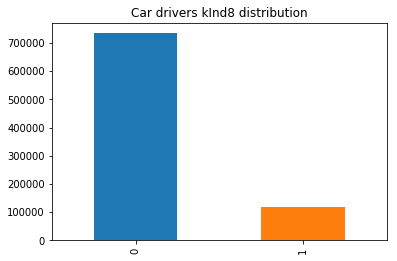

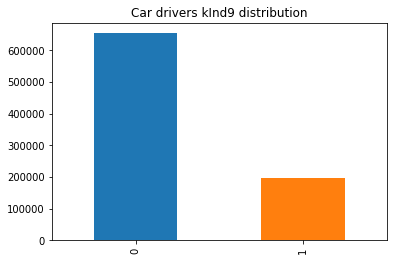

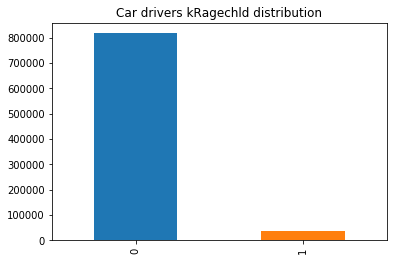

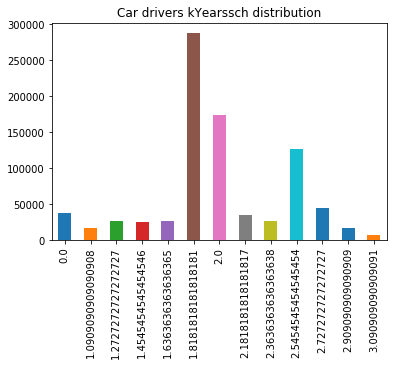

In [95]:
car_drivers = kNN_data3[kNN_data3['iMeans']=='1']

for col in car_drivers.columns:
        car_drivers[col].value_counts().sort_index().plot(kind = 'bar')
        plt.title('Car drivers' +  ' ' + col + ' distribution')
        plt.show()

In [8]:
iMeans_types = {1:'car,truck,van',2:'Bus',3:'Streetcar',4:'Subway',5:'railroad',6:'ferry',7:'taxi',8:'motorcycle',9:'bicycle',10:'walked',11:'worked_at_home',12:'other'}
x_axis_order = [0,1,2,3,4,5,6]
# counted = iMeans_dataframes[i]['dTravtime'].value_counts()
# print(counted.sort_index())
for i in iMeans_dataframes.keys():
      iMeans_dataframes[i]['dOccup'].value_counts().sort_index().plot(kind="bar")
      plt.title('Occupation: ' + iMeans_types[i])
      plt.show()
    
    #    sns.barplot(x='iMeans', y='dTravtime', hue=None, data=users) 

AttributeError: 'list' object has no attribute 'keys'

In [9]:
# Creating variables for k Nearest Neighbors algorithm:

# iMeans, dAge, iCitizen, dDepart, dHours, dIncome1, 
#            iMarital, dOccup, iRagechld, iYearsch,iYearwrk,
#            iSex,dIndustry,dRearning,dTravtime

kNN_data3 = census_subset.copy()
kNN_data3['kAge'] = kNN_data3[kNN_data3['dAge'] != '1']['dAge']
kNN_data3['kAge'] = (pd.to_numeric(kNN_data3['kAge']) - 1 ) / 2.5

kNN_data3['kUS_born'] = np.where(kNN_data3['iCitizen']=='0',1,0)

kNN_data3['kDepart'] = np.where(kNN_data3['dDepart']=='0','1',kNN_data3['dDepart'])
kNN_data3['kDepart'] = (pd.to_numeric(kNN_data3['kDepart']) -1) / 2

kNN_data3['kIncome'] = (pd.to_numeric(kNN_data3['dIncome1'])-1)/ 1.5

kNN_data3['k40Hours'] = pd.to_numeric(kNN_data3['dHours'])
kNN_data3['k40Hours'] = np.where(kNN_data3['k40Hours']>4,1,0)

kNN_data3['kSex'] = pd.to_numeric(kNN_data3['iSex'])

kNN_data3['kMarital'] = np.where(kNN_data3['iMarital']=='0',1,0)
print(kNN_data3.shape, kNN_data3.columns)

# Setting dummies for occup:
dummies = pd.get_dummies(kNN_data3['dOccup'])
atom_col = [c for c in dummies.columns]
print(atom_col)
for col in atom_col:
    s = dummies[col]
    kNN_data3 = pd.concat((kNN_data3,s), axis=1, join='inner')
    kNN_data3.rename(columns={'1':"kOcc1",'2':"kOcc2",'3':'kOcc3','4':'kOcc4',
         '5':'kOcc5','6':'kOcc6','7':'kOcc7','8':'kOcc8'}, inplace=True)

# Setting dummies for Industry:
dummies2 = pd.get_dummies(kNN_data3['dIndustry'])
atom_col = [c for c in dummies2.columns]
for col in atom_col:
    s = dummies2[col]
    kNN_data3 = pd.concat((kNN_data3,s), axis=1, join='inner')
    kNN_data3.rename(columns={'1':"kInd1",'2':"kInd2",'3':'kInd3','4':'kInd4',
        '5':'kInd5','6':'kInd6','7':'kInd7','8':'kInd8','9':'kInd9','10':'kInd10','11':'kInd11'}, inplace=True)

kNN_data3['kRagechld'] = np.where(kNN_data3['iRagechld']=='1',1,0)

kNN_data3['kYearssch'] = pd.to_numeric(kNN_data3['iYearsch'])
kNN_data3['kYearssch'] = np.where(kNN_data3['kYearssch']<6,0,kNN_data3['kYearssch'])
kNN_data3['kYearssch'] = kNN_data3['kYearssch'] / 5.5

print(kNN_data3.shape, kNN_data3.columns)

features = ['kAge', 'kUS_born', 'kDepart','kIncome', 'k40Hours', 'kSex', 'kMarital', 'kOcc1', 
            'kOcc2', 'kOcc3','kOcc4', 'kOcc5', 'kOcc6', 'kInd1', 'kInd10', 'kInd2', 'kInd3', 
            'kInd4','kInd5', 'kInd6', 'kInd7', 'kInd8', 'kInd9', 'kRagechld', 'kYearssch']




(988873, 24) Index(['iMeans', 'dAge', 'iCitizen', 'dDepart', 'dHours', 'dIncome1',
       'iMarital', 'dOccup', 'iRagechld', 'iYearsch', 'iYearwrk', 'iSex',
       'dIndustry', 'dRearning', 'dTravtime', 'intTravtime', 'intIndustry',
       'kAge', 'kUS_born', 'kDepart', 'kIncome', 'k40Hours', 'kSex',
       'kMarital'],
      dtype='object')
['1', '2', '3', '4', '5', '6']
(988873, 42) Index(['iMeans', 'dAge', 'iCitizen', 'dDepart', 'dHours', 'dIncome1',
       'iMarital', 'dOccup', 'iRagechld', 'iYearsch', 'iYearwrk', 'iSex',
       'dIndustry', 'dRearning', 'dTravtime', 'intTravtime', 'intIndustry',
       'kAge', 'kUS_born', 'kDepart', 'kIncome', 'k40Hours', 'kSex',
       'kMarital', 'kOcc1', 'kOcc2', 'kOcc3', 'kOcc4', 'kOcc5', 'kOcc6',
       'kInd1', 'kInd10', 'kInd2', 'kInd3', 'kInd4', 'kInd5', 'kInd6', 'kInd7',
       'kInd8', 'kInd9', 'kRagechld', 'kYearssch'],
      dtype='object')


In [10]:
print(kNN_data3.head())

  iMeans dAge iCitizen dDepart dHours dIncome1 iMarital dOccup iRagechld  \
0      1    5        0       3      3        2        1      3         4   
1      1    6        0       5      1        1        0      2         4   
2     10    3        0       4      4        1        4      4         4   
3      1    4        0       3      3        1        2      2         2   
4     11    4        0       0      5        2        0      3         2   

  iYearsch    ...     kInd2 kInd3 kInd4 kInd5 kInd6  kInd7  kInd8  kInd9  \
0       11    ...         0     0     0     0     0      0      0      0   
1        5    ...         0     0     1     0     0      0      0      0   
2       10    ...         0     0     0     0     0      0      0      0   
3       10    ...         0     0     1     0     0      0      0      0   
4       11    ...         0     0     0     0     0      0      0      1   

   kRagechld  kYearssch  
0          0   2.000000  
1          0   0.000000  
2       

In [15]:
features = ['kAge', 'kUS_born', 'kDepart','kIncome', 'k40Hours', 'kSex', 'kMarital', 'kOcc1', 
            'kOcc2', 'kOcc3','kOcc4', 'kOcc5', 'kOcc6', 'kInd1', 'kInd10', 'kInd2', 'kInd3', 
            'kInd4','kInd5', 'kInd6', 'kInd7', 'kInd8', 'kInd9', 'kRagechld', 'kYearssch']

# Select car and bus users:
car_bus = kNN_data3.loc[kNN_data3['iMeans'].isin(['1','2'])]
Bus_Class = np.where(car_bus['iMeans']=='2',1,0)
X = car_bus[features]
y = Bus_Class
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [35]:
# nearest = neigh.kneighbors()
closest_by_index=nearest[1]
print(closest_by_index[0])
print(y[0]) 
print(X[0:1])

[128383 135162 294338 378472 852675 874722 840981 756665 344944 201557
 188635 383780 596500 709130 741440 210751 285404 411595  39369  26716]
0
   kAge  kUS_born  kDepart   kIncome  k40Hours  kSex  kMarital  kOcc1  kOcc2  \
0   1.6         1      1.0  0.666667         0     1         0      0      0   

   kOcc3    ...      kInd2  kInd3  kInd4  kInd5  kInd6  kInd7  kInd8  kInd9  \
0      1    ...          0      0      0      0      0      0      0      0   

   kRagechld  kYearssch  
0          0        2.0  

[1 rows x 25 columns]


In [58]:
print(len(np.where(y==1)[0]))

24196


In [67]:
bus = [0]*len(closest_by_index)
for i in range(len(closest_by_index)):
    if y[i] == 0:
        for j in closest_by_index[i]:
            if y[j] == 1:
                bus[i] += 1
    else:
        bus[i] == 31
    if i % 10000 == 0:
        print(i)     

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000


AttributeError: 'list' object has no attribute 'value_counts'

In [68]:
X = car_bus[features]
index1 = X.index
print(X.head())
print(bus[-20:])
print(y[-20:])
print(index1[0:20])
bus_combined = pd.concat([pd.Series(y,index=index1),pd.Series(bus,index=index1),X], axis=1)
bus_combined.rename(columns = {0:'y',1:'kNN_bus'}, inplace = True)
print(bus_combined.head(30))
print(bus_combined.columns)
bus_combined.to_csv('bus_kNN2.csv')


   kAge  kUS_born  kDepart   kIncome  k40Hours  kSex  kMarital  kOcc1  kOcc2  \
0   1.6         1      1.0  0.666667         0     1         0      0      0   
1   2.0         1      2.0  0.000000         0     1         1      0      1   
3   1.2         1      1.0  0.000000         0     1         0      0      1   
5   1.6         1      1.0  1.333333         0     0         1      1      0   
6   1.2         1      2.0  0.000000         0     1         1      1      0   

   kOcc3    ...      kInd2  kInd3  kInd4  kInd5  kInd6  kInd7  kInd8  kInd9  \
0      1    ...          0      0      0      0      0      0      0      0   
1      0    ...          0      0      1      0      0      0      0      0   
3      0    ...          0      0      1      0      0      0      0      0   
5      0    ...          0      0      0      0      1      0      0      0   
6      0    ...          0      0      0      0      0      1      0      0   

   kRagechld  kYearssch  
0          0   2.0

In [92]:
print(bus_combined['kNN_bus'].value_counts())
print(8972+2707+1886+1051+404+242+155+140)

0     607455
1     172101
2      57860
3      22617
4       8972
5       3707
6       1886
7       1051
8        404
9        242
10       155
11        54
12        49
13        22
14        12
15         6
17         3
Name: kNN_bus, dtype: int64
15557


In [89]:
# Finding the clusters of people close to bus riders (bus[i]>= 1)

#Exclude current bus riders:
combined_non_bus = bus_combined[bus_combined['y']==0]
from sklearn.cluster import KMeans
combined_near_bus = combined_non_bus[combined_non_bus['kNN_bus'].isin(range(4,31))]
print(combined_near_bus.head(), combined_near_bus.shape)
X = combined_near_bus[features]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
output = kmeans.labels_
kmeans_features = pd.concat([X,pd.Series(output,index=X.index)], axis=1)
kmeans_features.rename(columns = {0:'cluster'}, inplace = True)


     y  kNN_bus  kAge  kUS_born  kDepart   kIncome  k40Hours  kSex  kMarital  \
146  0        4   1.2         1      0.5  1.333333         0     1         0   
210  0        6   1.6         1      0.5  0.666667         0     1         0   
243  0        5   2.0         1      1.0  0.000000         0     1         0   
331  0        5   0.8         1      0.0  0.000000         0     0         0   
349  0        6   1.2         0      1.5  0.000000         0     0         0   

     kOcc1    ...      kInd2  kInd3  kInd4  kInd5  kInd6  kInd7  kInd8  kInd9  \
146      1    ...          0      0      0      0      0      0      1      0   
210      0    ...          0      0      0      0      0      0      1      0   
243      0    ...          0      0      0      0      0      0      0      1   
331      0    ...          0      0      0      0      0      1      0      0   
349      0    ...          0      0      0      0      0      0      1      0   

     kRagechld  kYearssch  
146 

In [90]:
print(kmeans_features)

        kAge  kUS_born  kDepart   kIncome  k40Hours  kSex  kMarital  kOcc1  \
146      1.2         1      0.5  1.333333         0     1         0      1   
210      1.6         1      0.5  0.666667         0     1         0      0   
243      2.0         1      1.0  0.000000         0     1         0      0   
331      0.8         1      0.0  0.000000         0     0         0      0   
349      1.2         0      1.5  0.000000         0     0         0      0   
463      1.2         0      0.5 -0.666667         0     0         0      0   
569      0.8         0      0.0  0.000000         0     0         0      0   
620      2.0         0      0.5 -0.666667         0     0         0      0   
623      0.8         1      2.0  0.000000         0     1         0      0   
628      2.0         1      0.5  0.666667         0     1         0      0   
663      1.6         0      1.5 -0.666667         0     0         1      0   
717      0.8         1      1.5  0.666667         0     1       

              kAge     kUS_born      kDepart      kIncome     k40Hours  \
count  4891.000000  4891.000000  4891.000000  4891.000000  4891.000000   
mean      1.280883     0.623185     1.050399     0.009269     0.043345   
std       0.521348     0.484637     0.598110     0.360143     0.203653   
min       0.400000     0.000000     0.000000    -0.666667     0.000000   
25%       0.800000     0.000000     0.500000     0.000000     0.000000   
50%       1.200000     1.000000     1.000000     0.000000     0.000000   
75%       1.600000     1.000000     1.500000     0.000000     0.000000   
max       2.400000     1.000000     2.000000     2.000000     1.000000   

              kSex     kMarital        kOcc1   kOcc2        kOcc3   ...     \
count  4891.000000  4891.000000  4891.000000  4891.0  4891.000000   ...      
mean      0.609282     0.146391     0.006338     0.0     0.986301   ...      
std       0.487961     0.353534     0.079368     0.0     0.116249   ...      
min       0.000000   

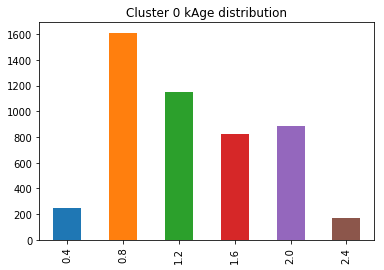

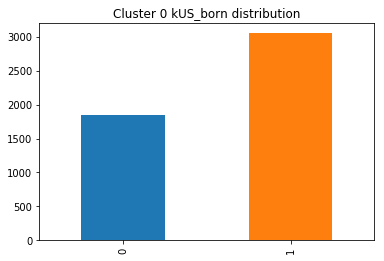

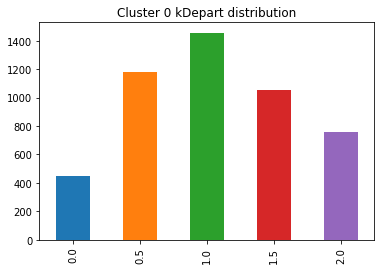

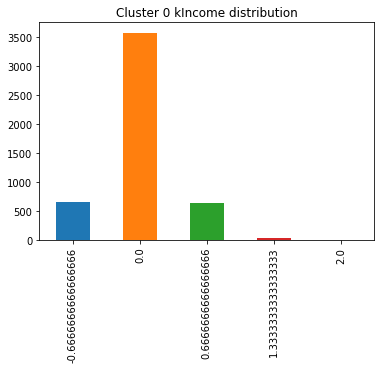

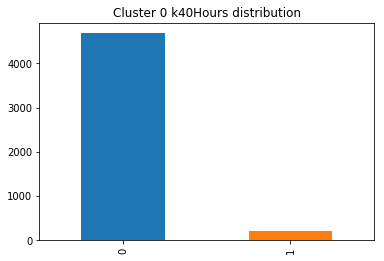

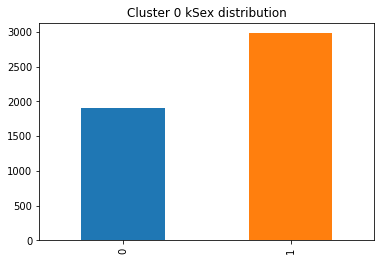

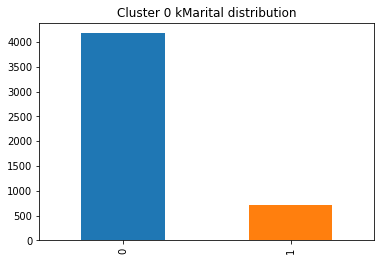

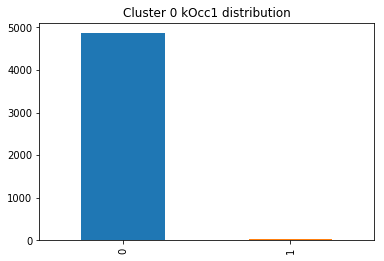

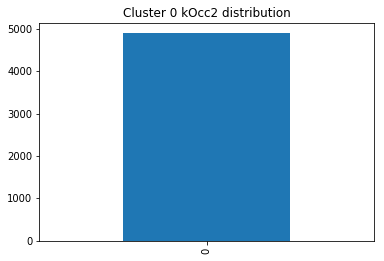

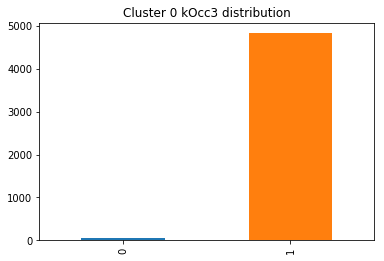

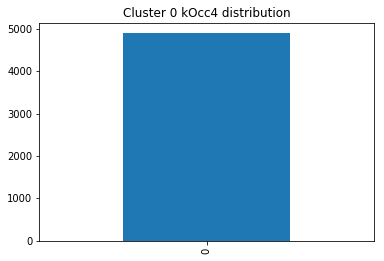

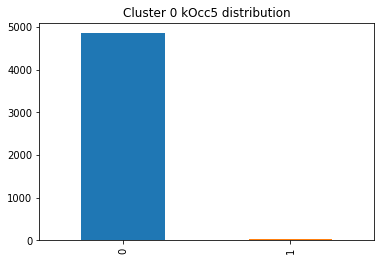

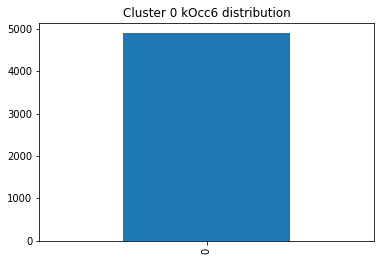

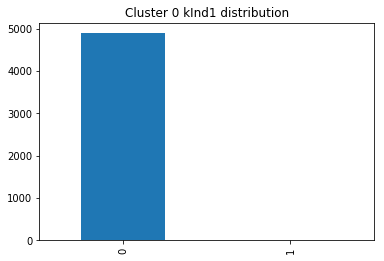

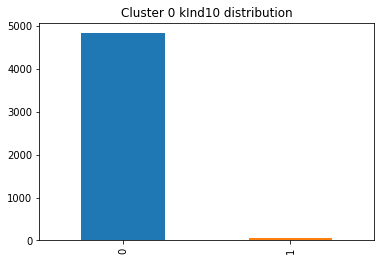

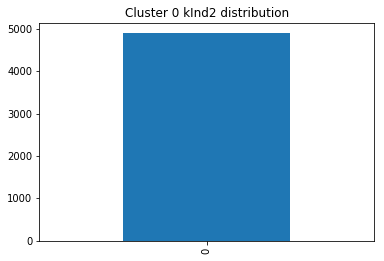

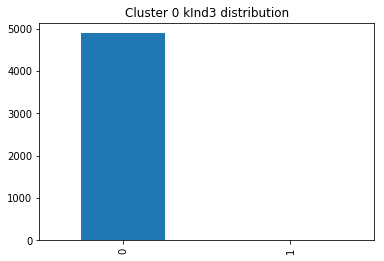

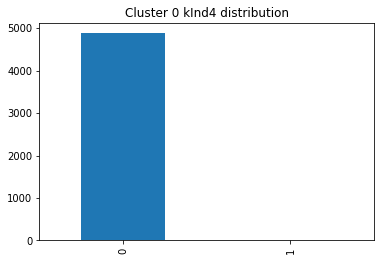

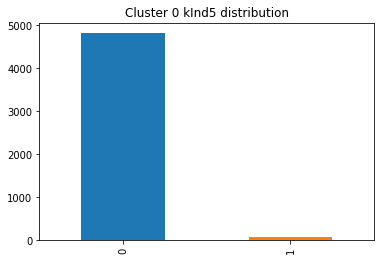

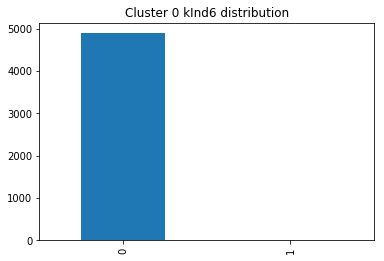

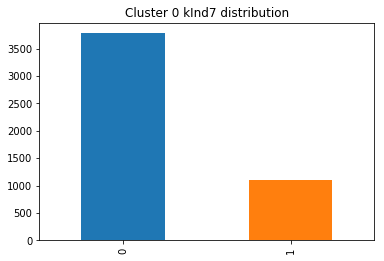

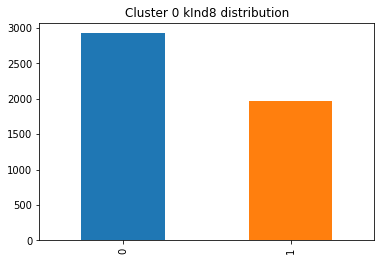

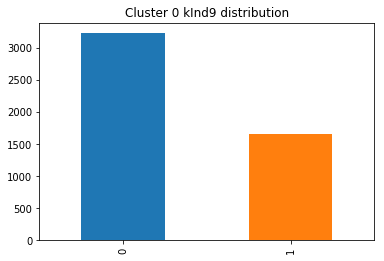

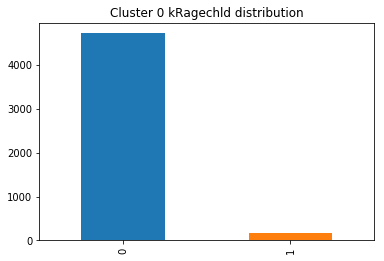

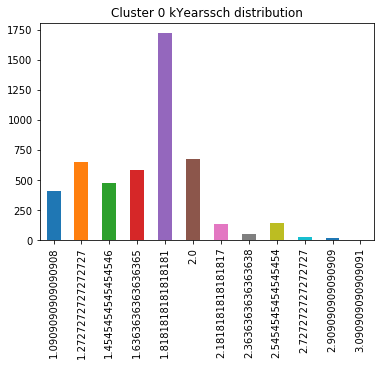

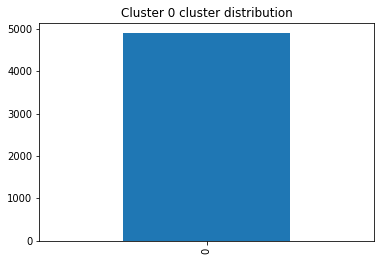

              kAge     kUS_born      kDepart      kIncome     k40Hours  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.338923     0.541210     0.869223     0.011752     0.029538   
std       0.501955     0.498418     0.489329     0.283108     0.169349   
min       0.400000     0.000000     0.000000    -0.666667     0.000000   
25%       0.800000     0.000000     0.500000     0.000000     0.000000   
50%       1.200000     1.000000     1.000000     0.000000     0.000000   
75%       1.600000     1.000000     1.000000     0.000000     0.000000   
max       2.400000     1.000000     2.000000     2.000000     1.000000   

              kSex     kMarital        kOcc1        kOcc2   kOcc3   ...     \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.0   ...      
mean      0.602192     0.324917     0.011910     0.001906     0.0   ...      
std       0.489562     0.468455     0.108509     0.043623     0.0   ...      
min       0.000000   

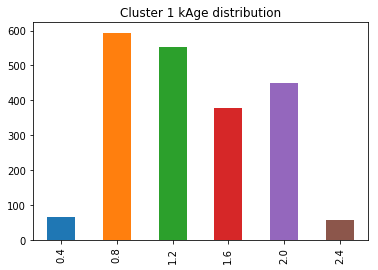

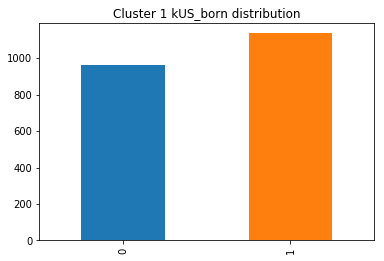

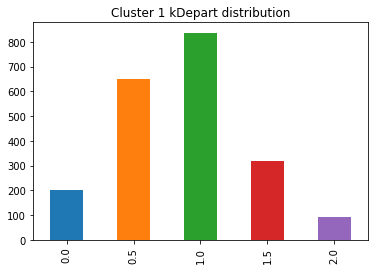

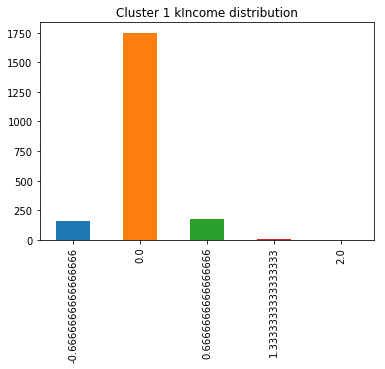

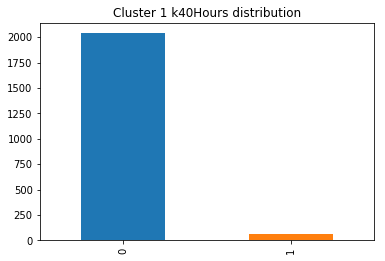

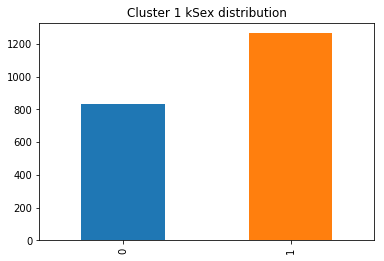

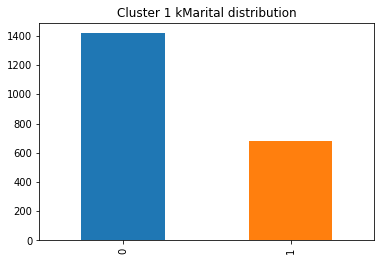

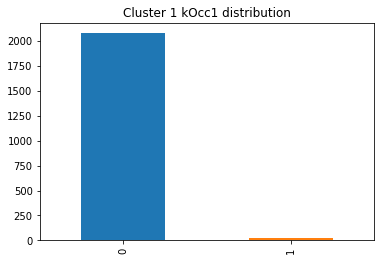

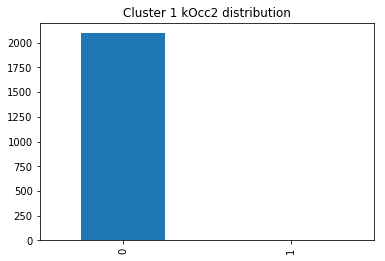

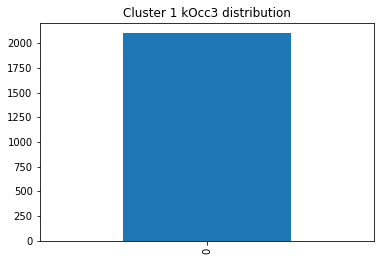

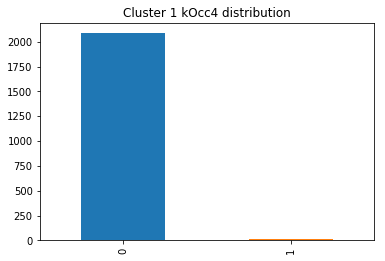

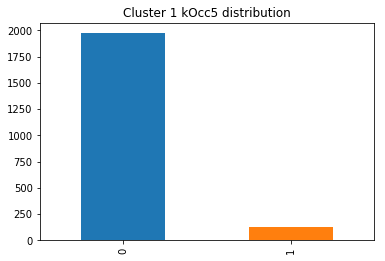

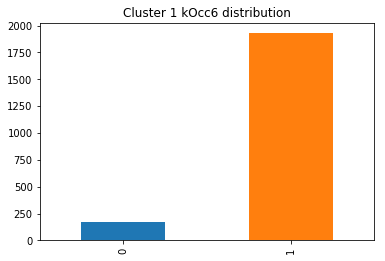

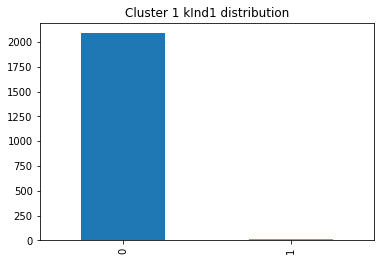

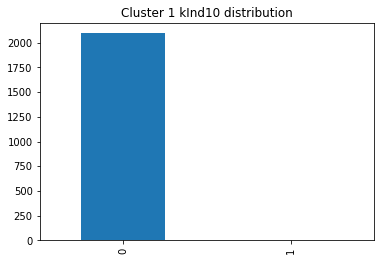

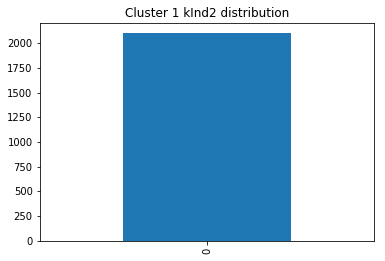

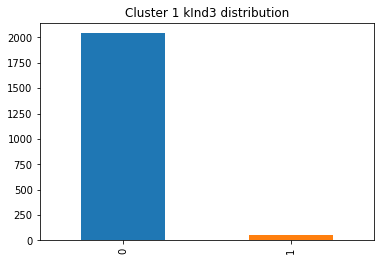

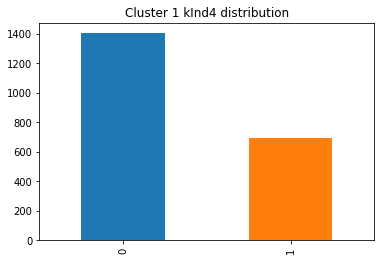

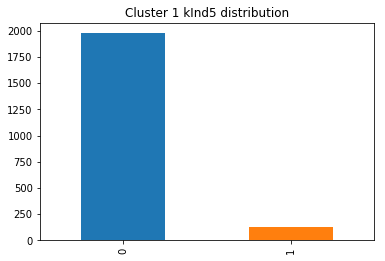

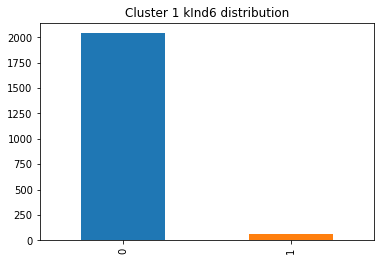

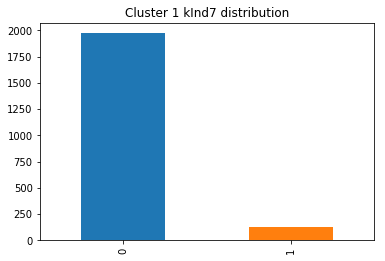

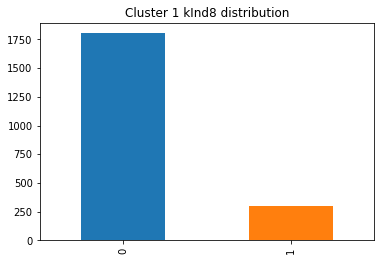

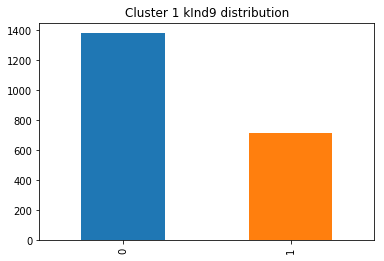

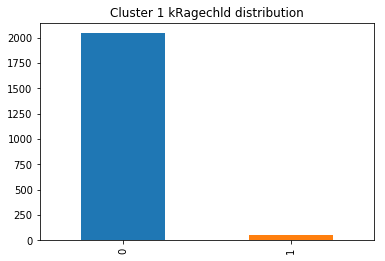

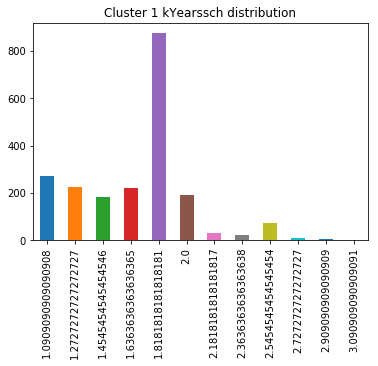

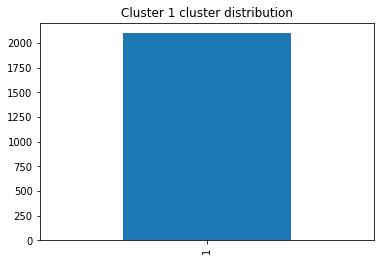

              kAge     kUS_born      kDepart      kIncome     k40Hours  \
count  5141.000000  5141.000000  5141.000000  5141.000000  5141.000000   
mean      1.361681     0.703949     0.924042     0.466576     0.031706   
std       0.512871     0.456558     0.527104     0.567904     0.175233   
min       0.400000     0.000000     0.000000    -0.666667     0.000000   
25%       0.800000     0.000000     0.500000     0.000000     0.000000   
50%       1.200000     1.000000     1.000000     0.666667     0.000000   
75%       1.600000     1.000000     1.500000     0.666667     0.000000   
max       2.400000     1.000000     2.000000     2.000000     1.000000   

              kSex     kMarital        kOcc1        kOcc2        kOcc3  \
count  5141.000000  5141.000000  5141.000000  5141.000000  5141.000000   
mean      0.752577     0.175841     0.179732     0.808792     0.000389   
std       0.431556     0.380722     0.384001     0.393291     0.019722   
min       0.000000     0.000000     0

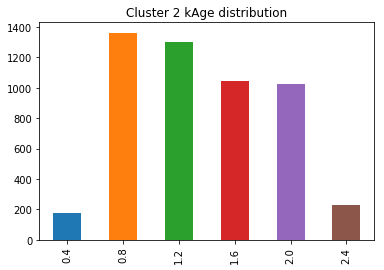

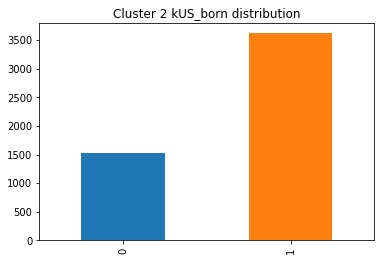

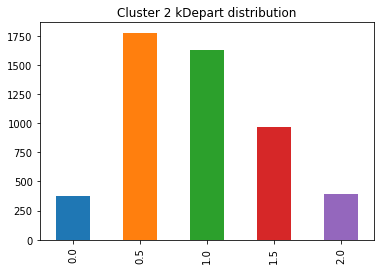

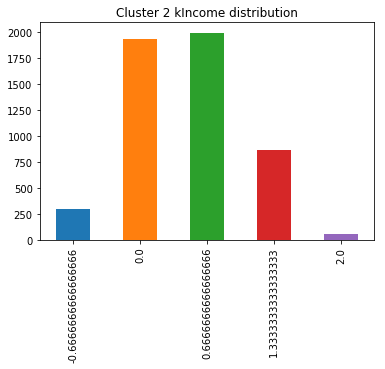

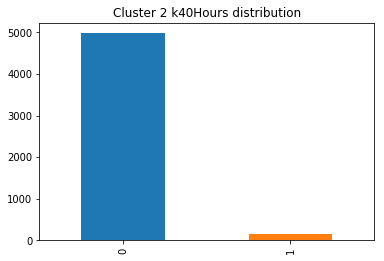

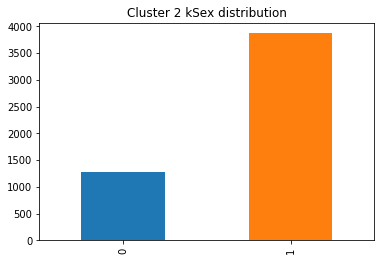

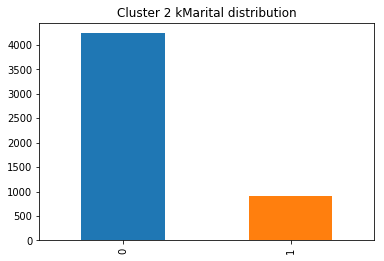

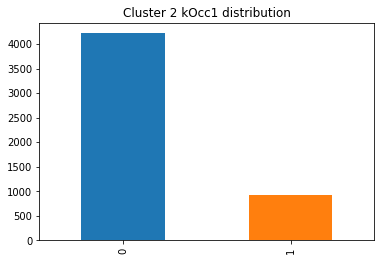

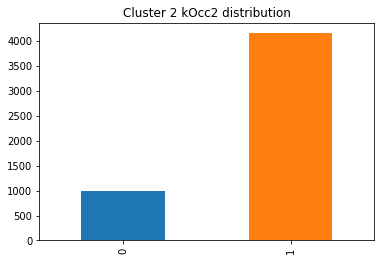

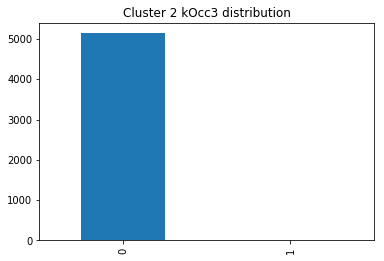

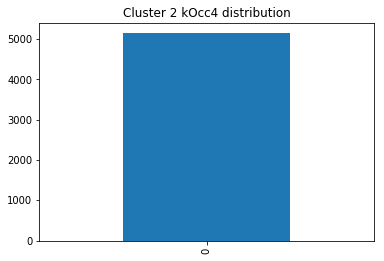

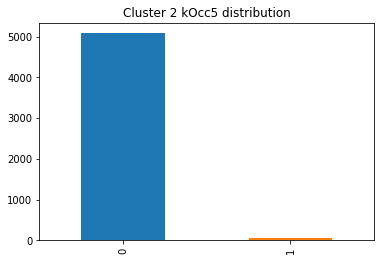

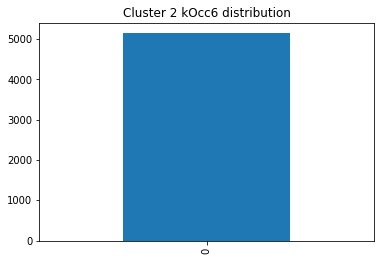

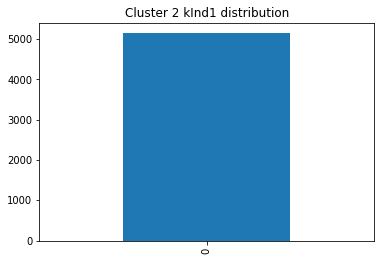

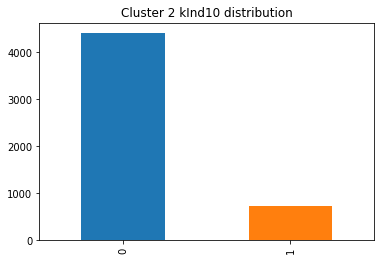

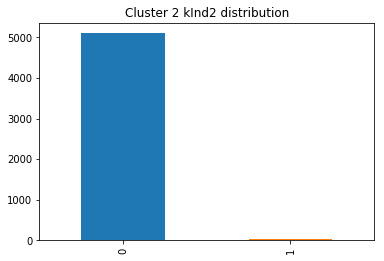

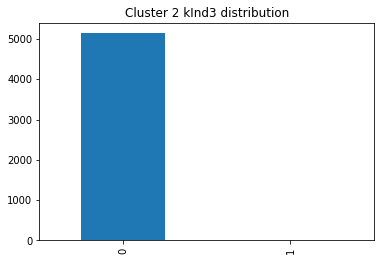

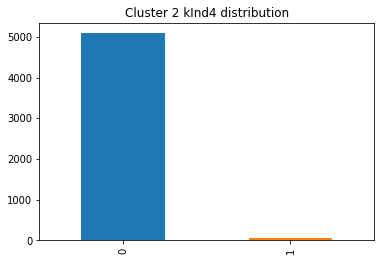

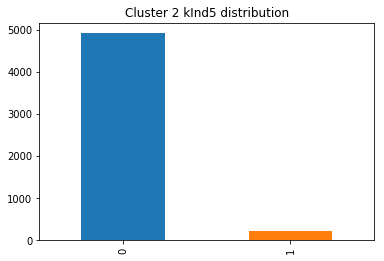

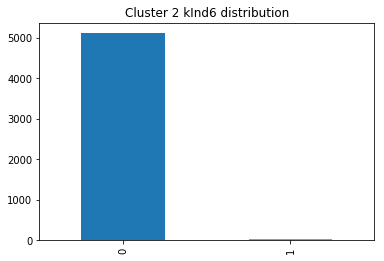

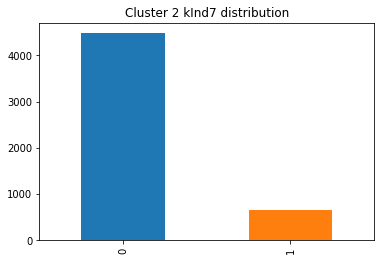

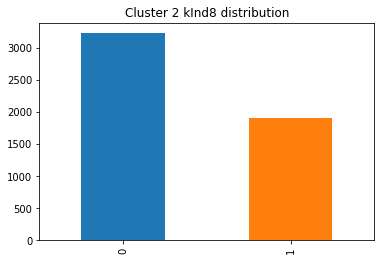

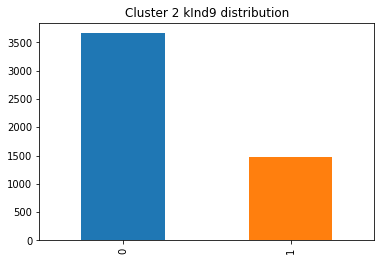

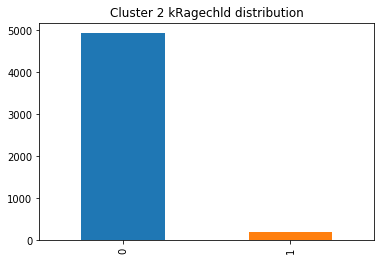

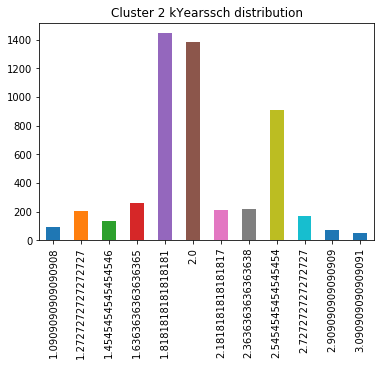

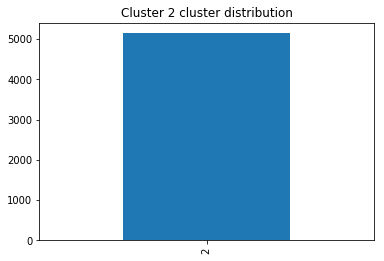

              kAge     kUS_born      kDepart      kIncome     k40Hours  \
count  4432.000000  4432.000000  4432.000000  4432.000000  4432.000000   
mean      1.405415     0.252482     1.067125     0.011733     0.058439   
std       0.535288     0.434485     0.620819     0.347026     0.234597   
min       0.400000     0.000000     0.000000    -0.666667     0.000000   
25%       0.800000     0.000000     0.500000     0.000000     0.000000   
50%       1.200000     0.000000     1.000000     0.000000     0.000000   
75%       2.000000     1.000000     1.500000     0.000000     0.000000   
max       2.400000     1.000000     2.000000     2.000000     1.000000   

              kSex     kMarital        kOcc1        kOcc2        kOcc3  \
count  4432.000000  4432.000000  4432.000000  4432.000000  4432.000000   
mean      0.568818     0.388764     0.025948     0.066336     0.478565   
std       0.495297     0.487524     0.158997     0.248896     0.499597   
min       0.000000     0.000000     0

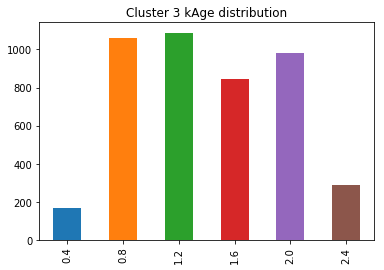

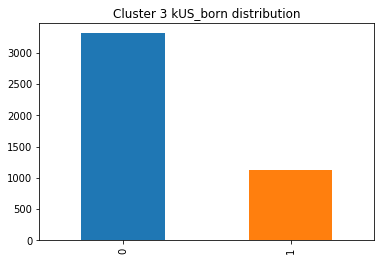

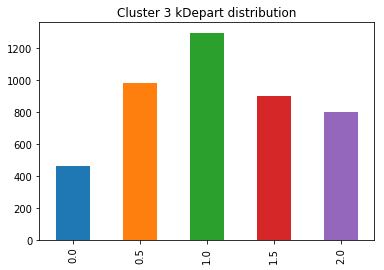

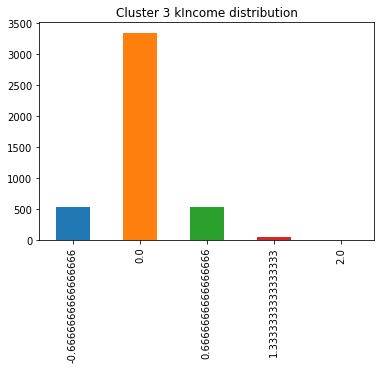

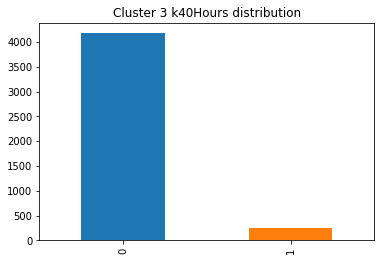

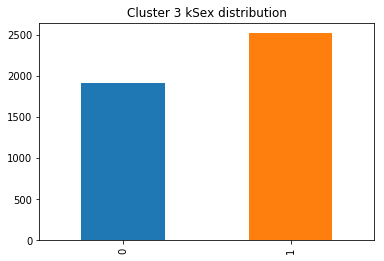

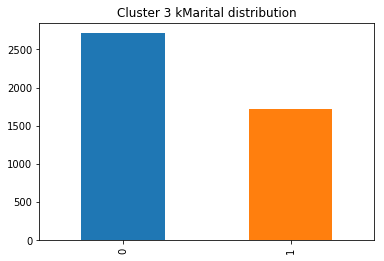

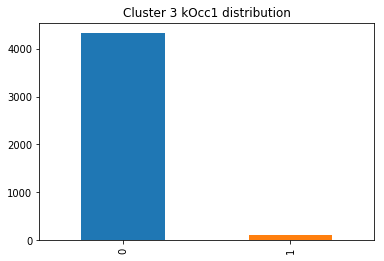

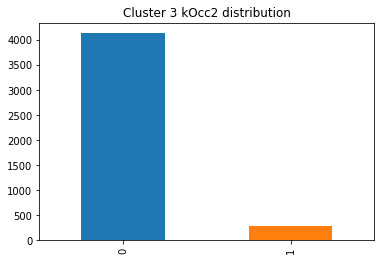

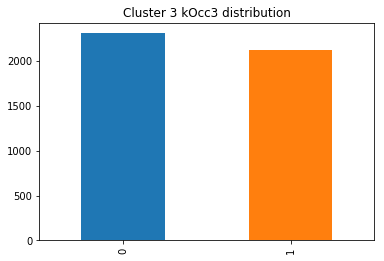

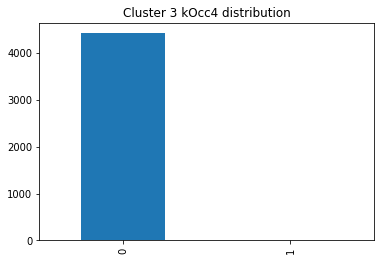

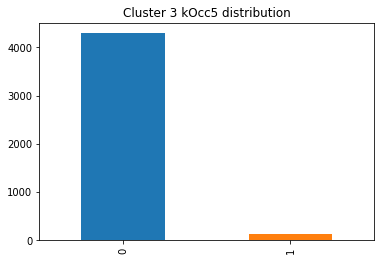

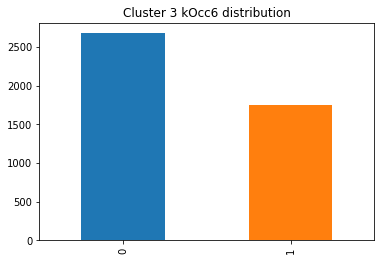

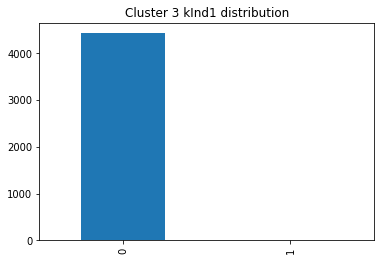

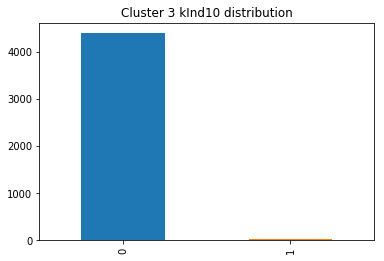

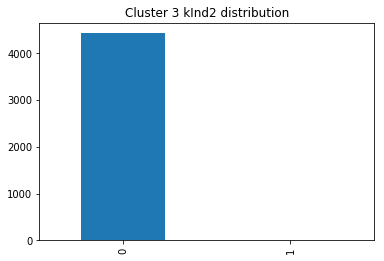

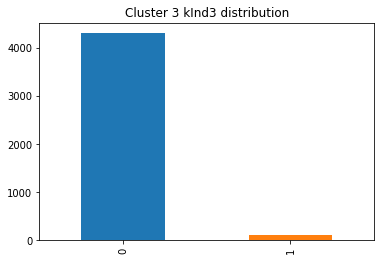

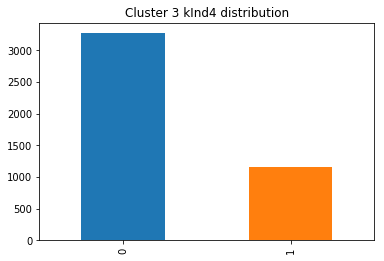

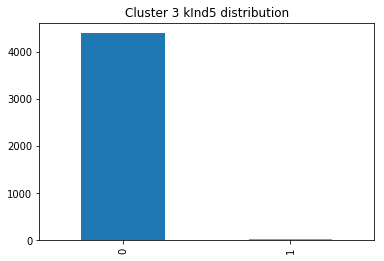

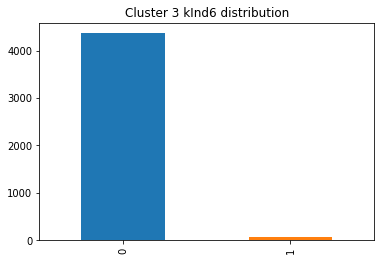

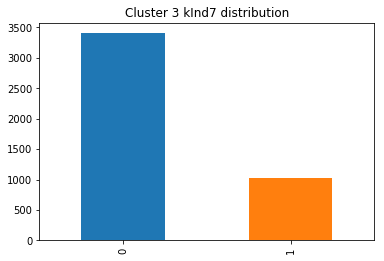

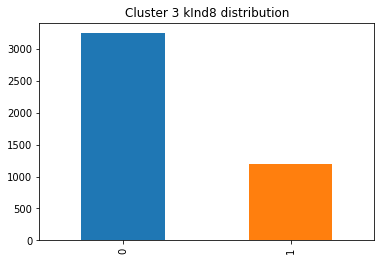

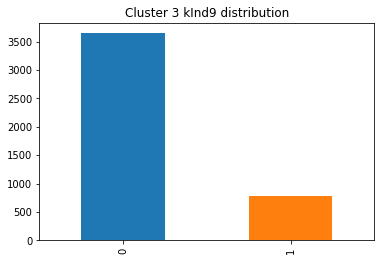

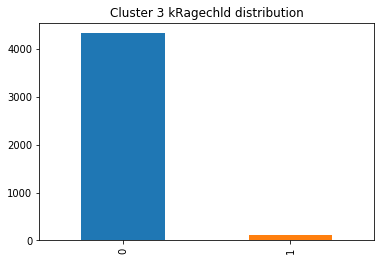

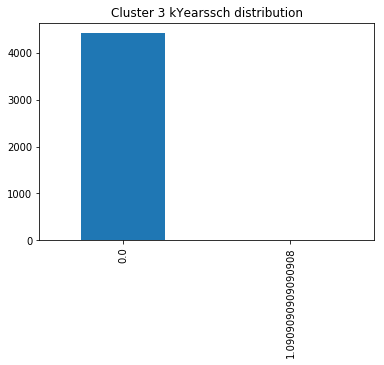

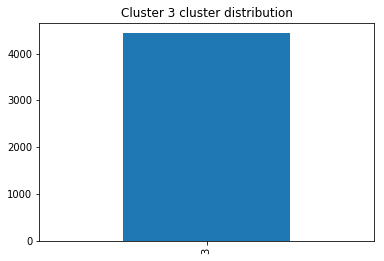

In [91]:
for i in range(4):
    kmeans_cluster = kmeans_features[kmeans_features['cluster']==i]
    print(kmeans_cluster.describe())
    for col in kmeans_cluster.columns:
        kmeans_cluster[col].value_counts().sort_index().plot(kind = 'bar')
        plt.title('Cluster ' + str(i) + ' ' + col + ' distribution')
        plt.show()